Import Packages

In [81]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [82]:
parent_dir = '../../../data/thread_ring/2/'

N = 100_000
R = 5_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}2/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}2/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}2/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}2/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [83]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 07:51:43 2025 +0200) (509.05ms elap...,0.382,0.0393,0.454,1.13,0.16,11.35,61.07 C,Nominal
1,(Sat Apr 5 07:51:44 2025 +0200) (508.29ms elap...,4.970,0.0683,0.577,5.92,0.99,82.48,60.70 C,Nominal
2,(Sat Apr 5 07:51:44 2025 +0200) (506.27ms elap...,4.710,0.0321,0.696,5.67,0.86,71.51,60.70 C,Nominal
3,(Sat Apr 5 07:51:45 2025 +0200) (508.79ms elap...,0.248,0.0281,0.414,0.86,0.17,11.60,60.30 C,Nominal
4,(Sat Apr 5 07:51:45 2025 +0200) (509.27ms elap...,0.286,0.0354,0.418,0.91,0.18,12.27,60.30 C,Nominal


In [84]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(313, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 07:51:54 2025 +0200) (108.14ms elap...,37.9,0.0683,2.190,39.49,3.98,99.51,58.14 C,Nominal
1,(Sat Apr 5 07:51:54 2025 +0200) (105.14ms elap...,37.2,0.0633,1.770,38.66,3.99,99.76,58.14 C,Nominal
2,(Sat Apr 5 07:51:55 2025 +0200) (105.47ms elap...,40.4,0.0480,1.780,43.39,3.97,99.53,58.14 C,Nominal
3,(Sat Apr 5 07:51:55 2025 +0200) (105.66ms elap...,41.7,0.0930,0.787,45.04,3.99,99.83,58.14 C,Nominal
4,(Sat Apr 5 07:51:55 2025 +0200) (104.59ms elap...,42.3,0.0549,0.950,46.10,3.99,99.71,61.43 C,Nominal


In [85]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 07:50:15 2025 +0200) (510.99ms elap...,0.2740,0.0000,0.263,0.48,0.07,4.50,48.71 C,Nominal
1,(Sat Apr 5 07:50:16 2025 +0200) (508.33ms elap...,0.1190,0.0334,0.382,0.37,0.07,4.48,48.77 C,Nominal
2,(Sat Apr 5 07:50:16 2025 +0200) (506.78ms elap...,1.0800,0.0000,0.273,1.29,0.16,13.50,48.77 C,Nominal
3,(Sat Apr 5 07:50:17 2025 +0200) (507.97ms elap...,0.0971,0.0000,0.271,0.29,0.05,3.94,48.80 C,Nominal
4,(Sat Apr 5 07:50:17 2025 +0200) (509.54ms elap...,0.0622,0.0000,0.254,0.26,0.03,2.21,48.80 C,Nominal


In [86]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(309, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 07:50:26 2025 +0200) (109.64ms elap...,20.40,0.0,0.684,21.24,2.79,95.07,48.54 C,Nominal
1,(Sat Apr 5 07:50:26 2025 +0200) (105.27ms elap...,18.40,0.0,0.784,19.26,2.50,99.82,48.54 C,Nominal
2,(Sat Apr 5 07:50:27 2025 +0200) (105.53ms elap...,11.00,0.0,0.965,11.98,1.24,99.85,48.54 C,Nominal
3,(Sat Apr 5 07:50:27 2025 +0200) (106.82ms elap...,10.00,0.0,1.280,11.06,1.02,98.72,48.54 C,Nominal
4,(Sat Apr 5 07:50:27 2025 +0200) (106.51ms elap...,9.87,0.0,1.290,11.05,1.03,98.79,48.82 C,Nominal


Clean the Data

In [87]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [88]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [89]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 07:51:43,0.382,0.0393,0.454,1.13,0.16,11.35,61.07,Nominal,509.05
1,2025-04-05 07:51:44,4.970,0.0683,0.577,5.92,0.99,82.48,60.70,Nominal,508.29
2,2025-04-05 07:51:44,4.710,0.0321,0.696,5.67,0.86,71.51,60.70,Nominal,506.27
3,2025-04-05 07:51:45,0.248,0.0281,0.414,0.86,0.17,11.60,60.30,Nominal,508.79
4,2025-04-05 07:51:45,0.286,0.0354,0.418,0.91,0.18,12.27,60.30,Nominal,509.27


In [90]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(313, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 07:51:54,37.9,0.0683,2.190,39.49,3.98,99.51,58.14,Nominal,108.14
1,2025-04-05 07:51:54,37.2,0.0633,1.770,38.66,3.99,99.76,58.14,Nominal,105.14
2,2025-04-05 07:51:55,40.4,0.0480,1.780,43.39,3.97,99.53,58.14,Nominal,105.47
3,2025-04-05 07:51:55,41.7,0.0930,0.787,45.04,3.99,99.83,58.14,Nominal,105.66
4,2025-04-05 07:51:55,42.3,0.0549,0.950,46.10,3.99,99.71,61.43,Nominal,104.59


In [91]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 07:50:15,0.2740,0.0000,0.263,0.48,0.07,4.50,48.71,Nominal,510.99
1,2025-04-05 07:50:16,0.1190,0.0334,0.382,0.37,0.07,4.48,48.77,Nominal,508.33
2,2025-04-05 07:50:16,1.0800,0.0000,0.273,1.29,0.16,13.50,48.77,Nominal,506.78
3,2025-04-05 07:50:17,0.0971,0.0000,0.271,0.29,0.05,3.94,48.80,Nominal,507.97
4,2025-04-05 07:50:17,0.0622,0.0000,0.254,0.26,0.03,2.21,48.80,Nominal,509.54


In [92]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(309, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 07:50:26,20.40,0.0,0.684,21.24,2.79,95.07,48.54,Nominal,109.64
1,2025-04-05 07:50:26,18.40,0.0,0.784,19.26,2.50,99.82,48.54,Nominal,105.27
2,2025-04-05 07:50:27,11.00,0.0,0.965,11.98,1.24,99.85,48.54,Nominal,105.53
3,2025-04-05 07:50:27,10.00,0.0,1.280,11.06,1.02,98.72,48.54,Nominal,106.82
4,2025-04-05 07:50:27,9.87,0.0,1.290,11.05,1.03,98.79,48.82,Nominal,106.51


Visualize the Data

In [93]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


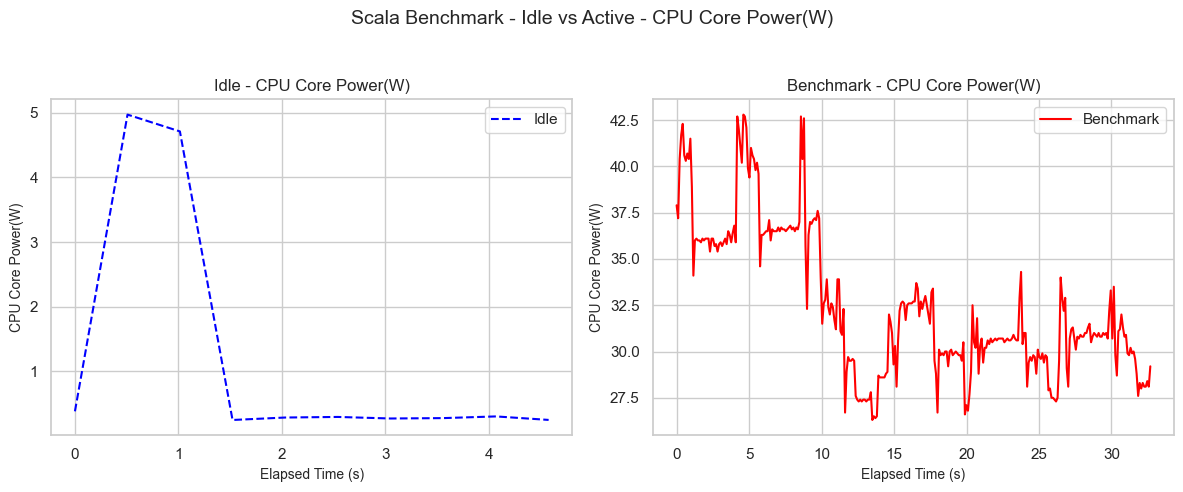

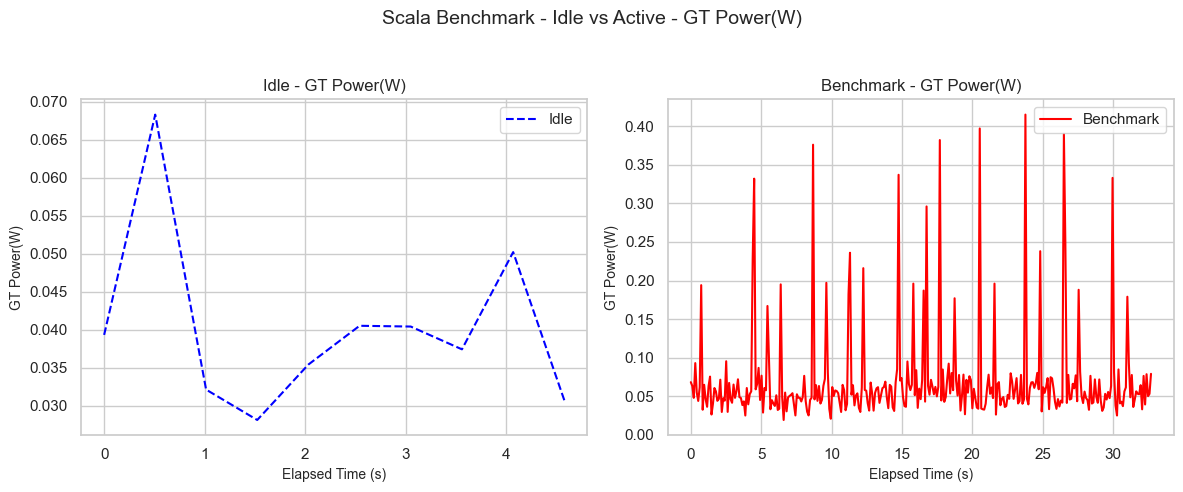

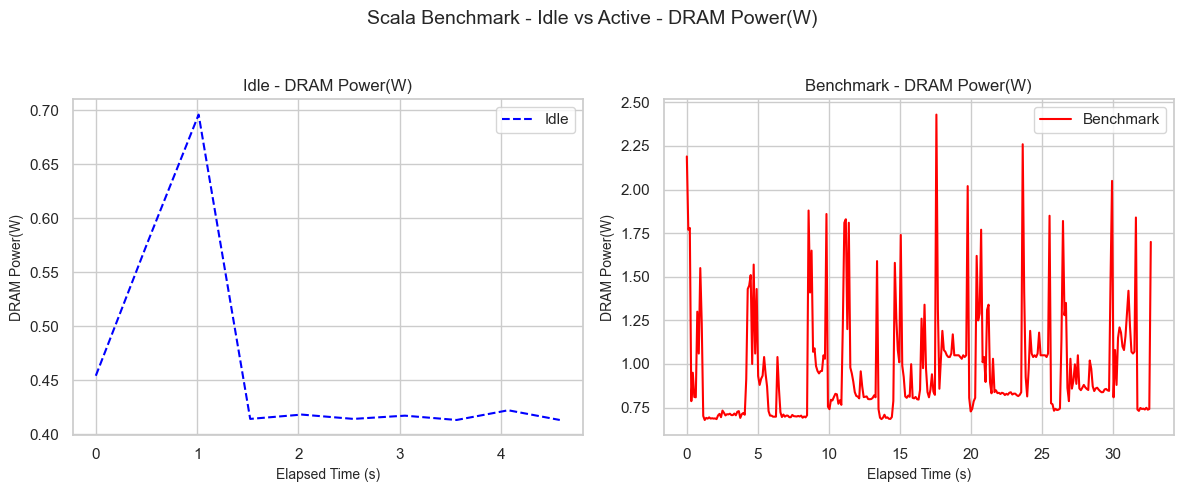

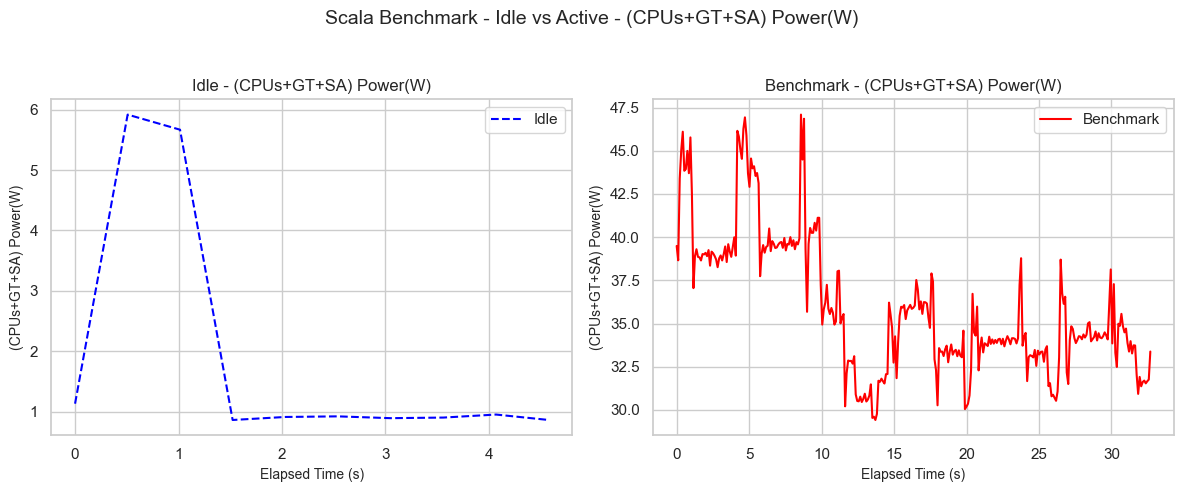

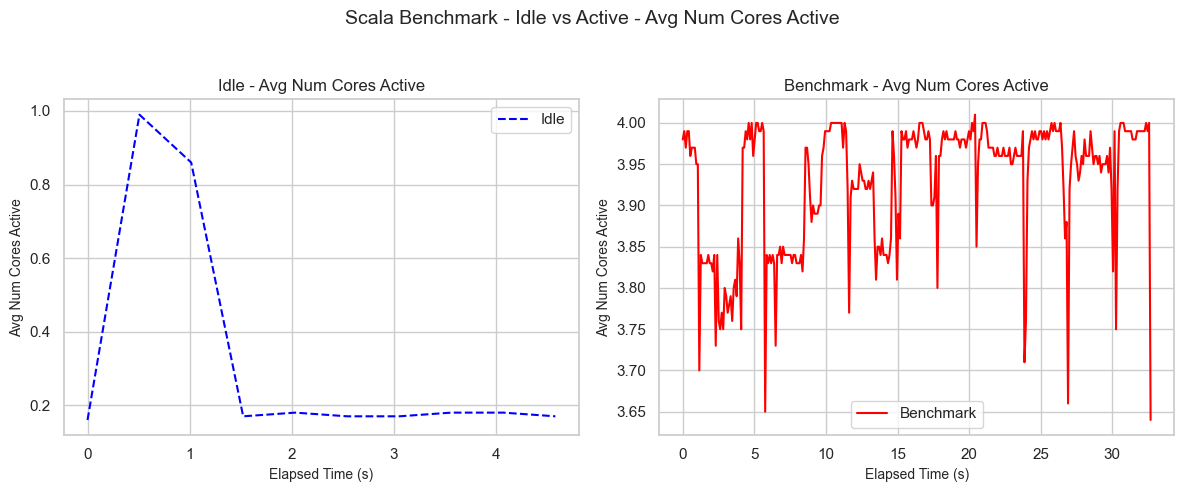

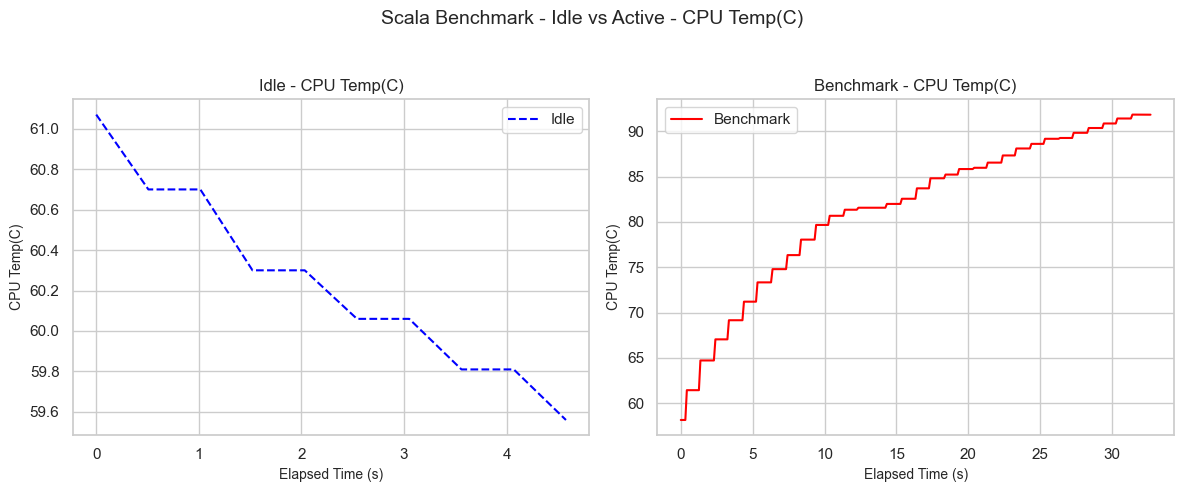

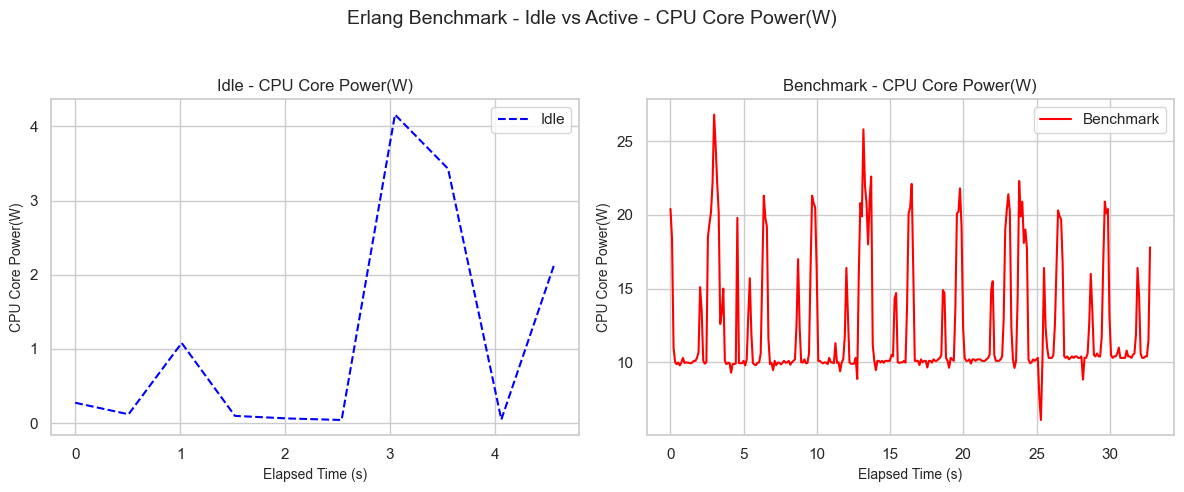

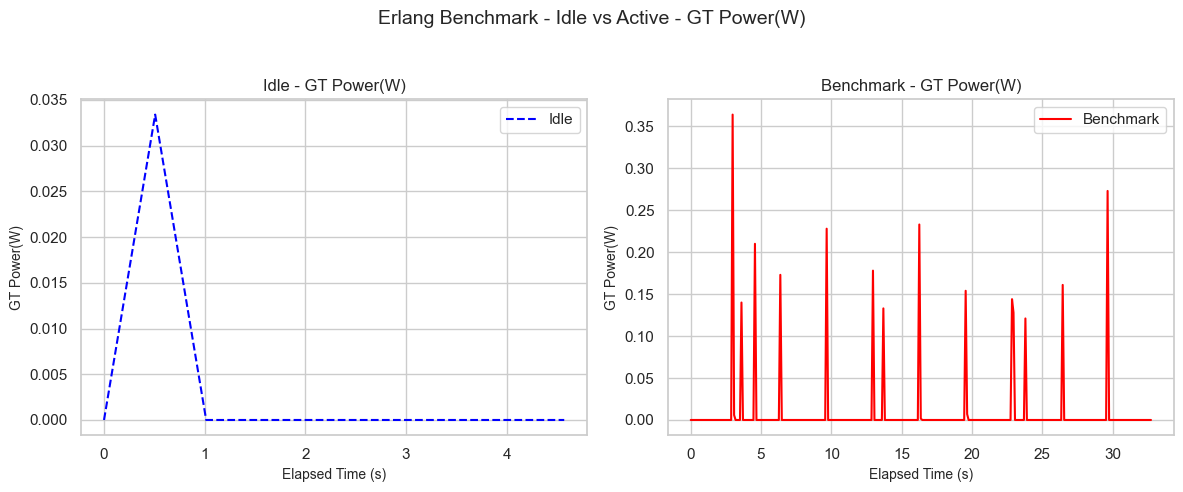

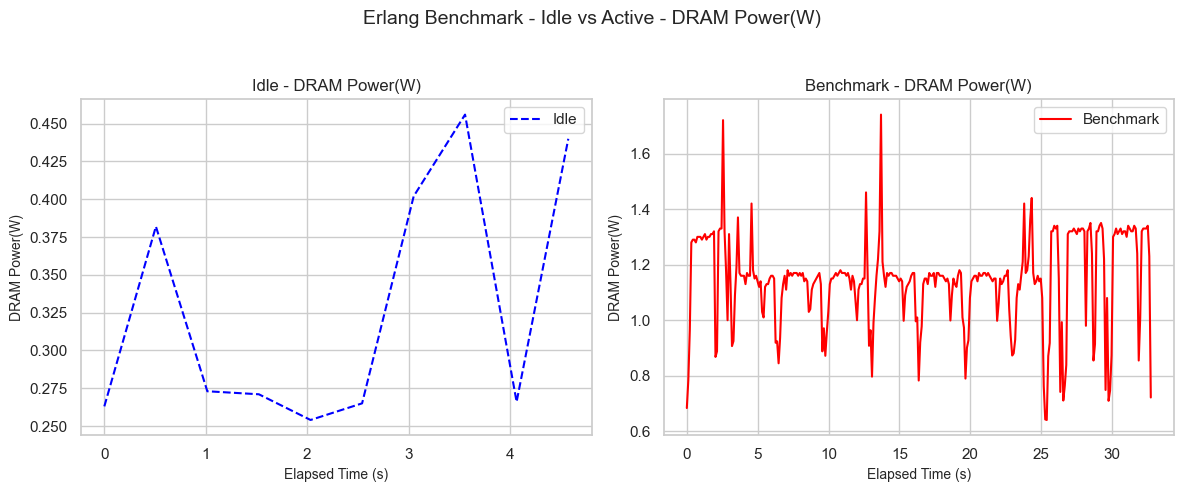

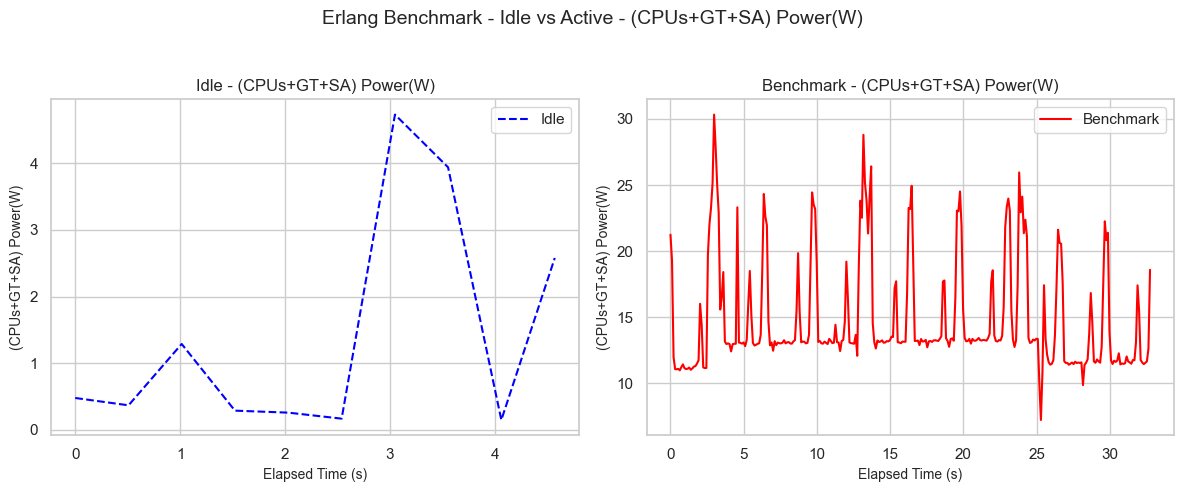

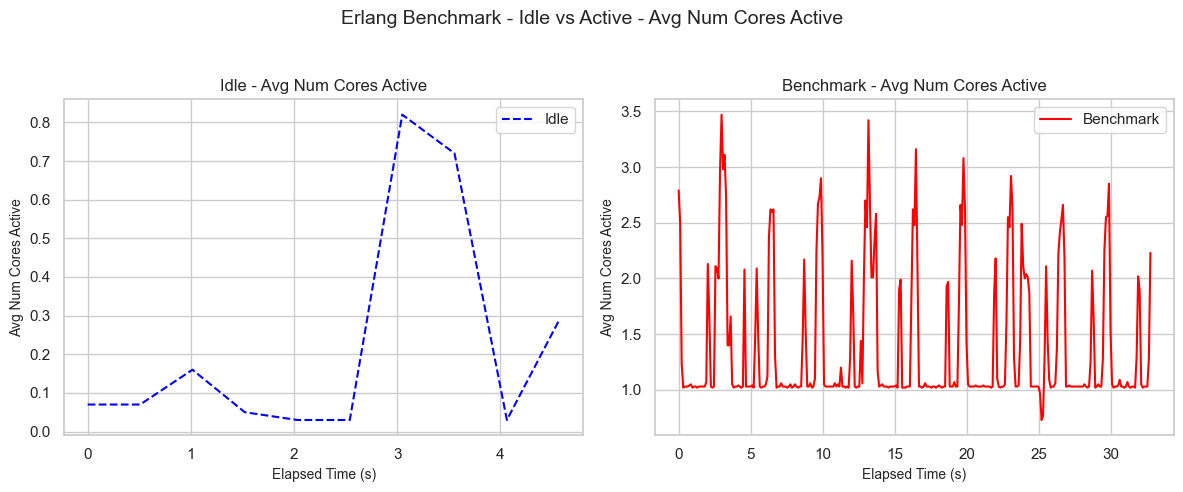

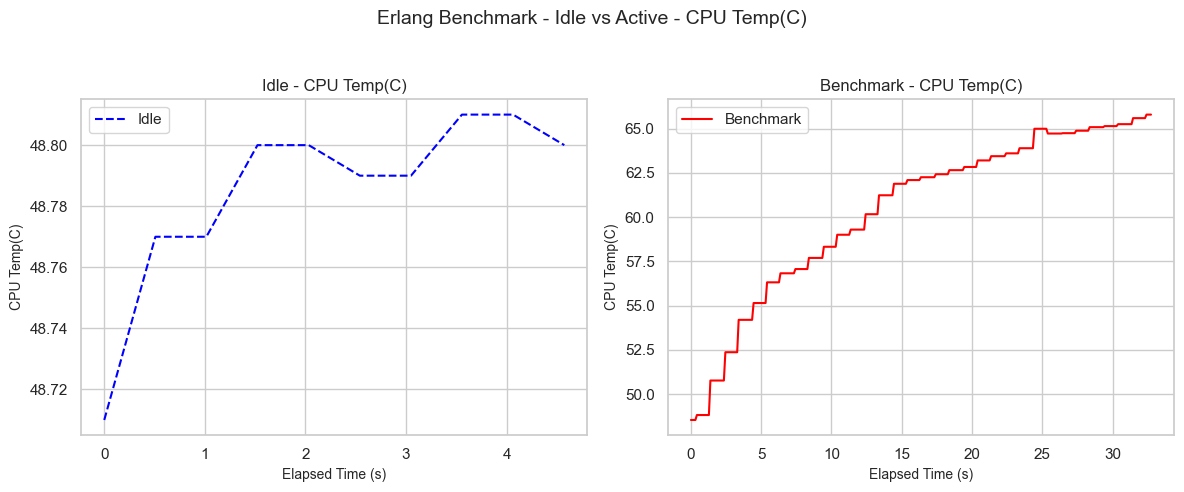

In [94]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [95]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [96]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

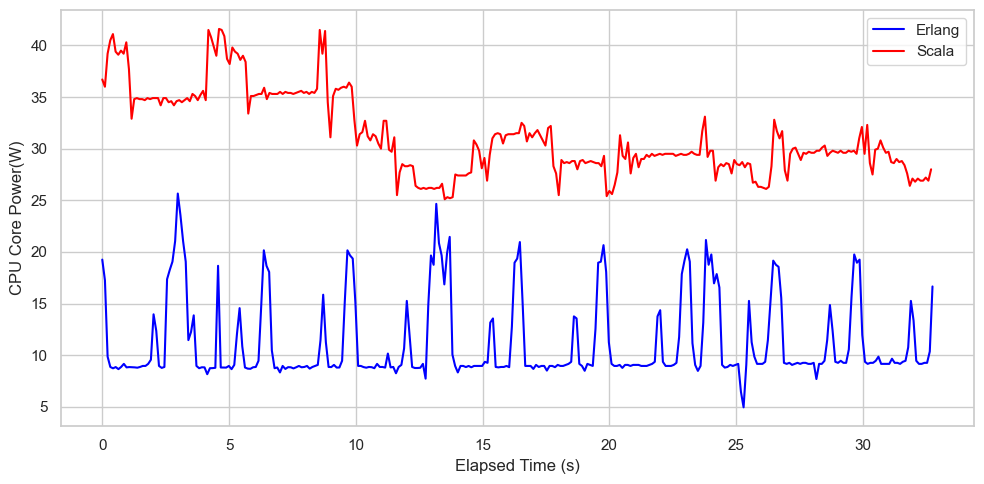

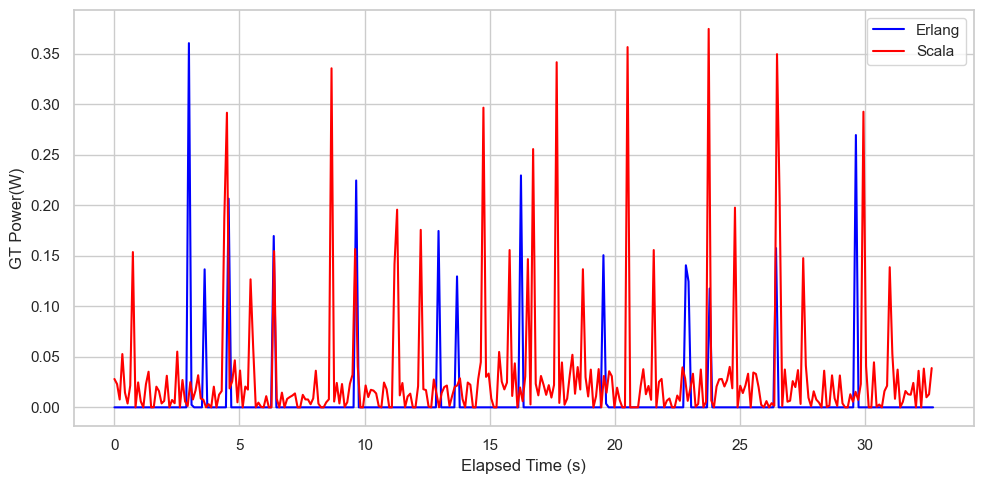

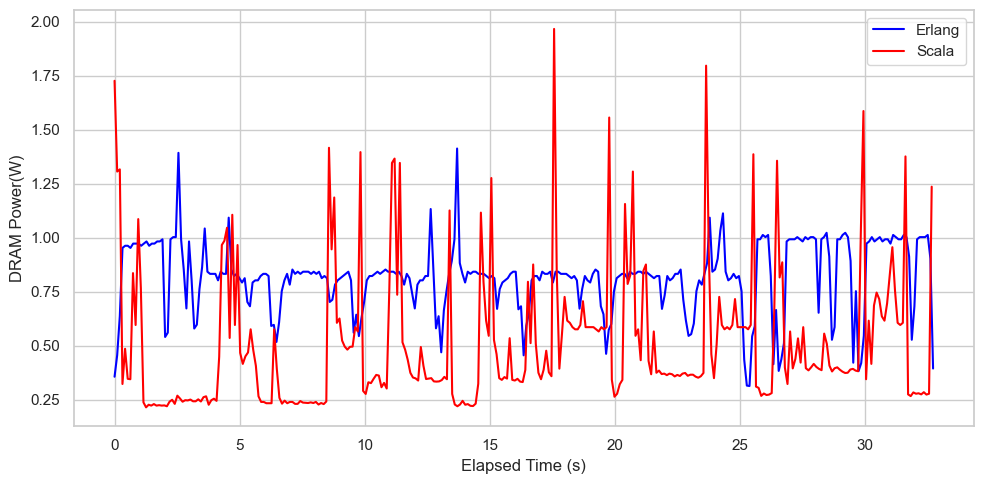

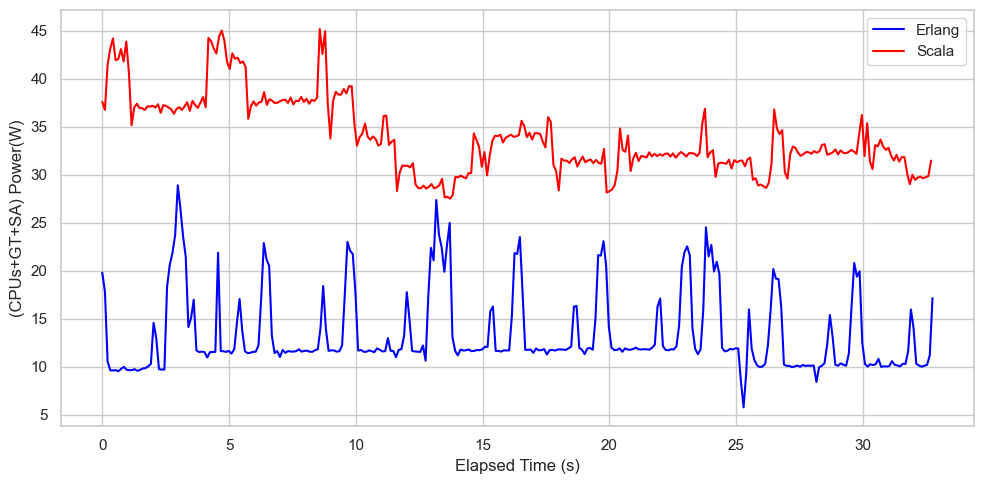

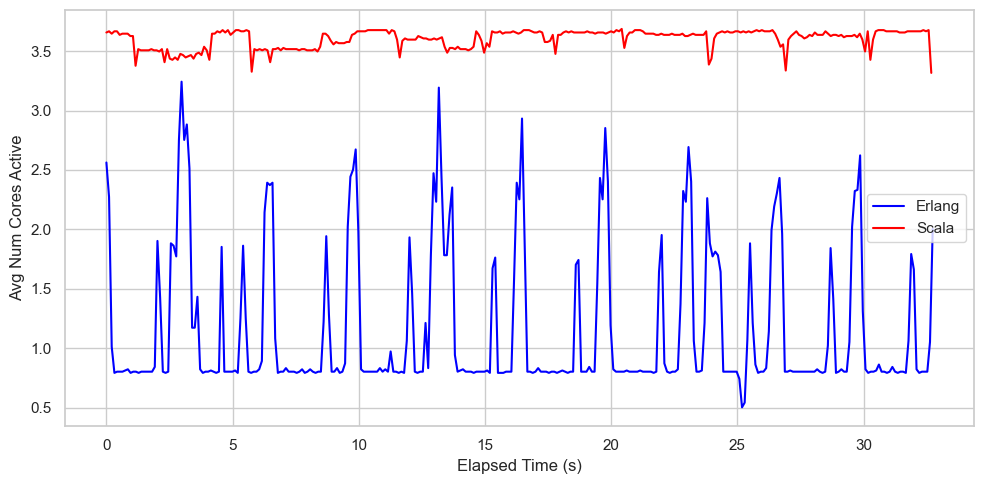

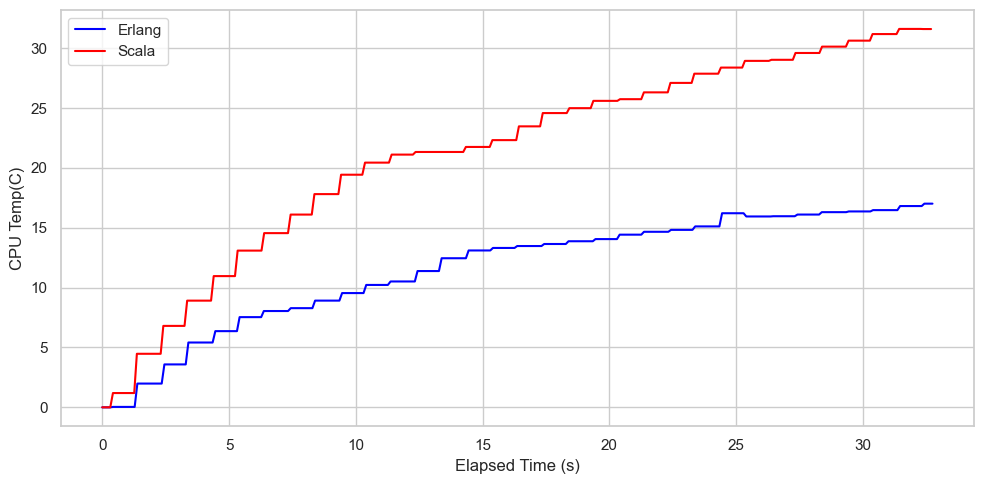

In [97]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [98]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [99]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Scala Idle Metrics:")
print(scala_idle_means, "\n")
print("Erlang Idle Metrics:")
print(erlang_idle_means, "\n")
print("Scala Benchmark Metrics:")
print(scala_bench_data[metrics_columns].mean(), "\n")
print("Erlang Benchmark Metrics:")
print(erlang_bench_data[metrics_columns].mean(), "\n")

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Scala Idle Metrics:
CPU Core Power(W)         1.19910
GT Power(W)               0.04024
DRAM Power(W)             0.46380
(CPUs+GT+SA) Power(W)     1.90100
CPU Temp(C)              60.23700
Avg Num Cores Active      0.32300
dtype: float64 

Erlang Idle Metrics:
CPU Core Power(W)         1.14724
GT Power(W)               0.00334
DRAM Power(W)             0.32720
(CPUs+GT+SA) Power(W)     1.42600
CPU Temp(C)              48.78500
Avg Num Cores Active      0.22700
dtype: float64 

Scala Benchmark Metrics:
CPU Core Power(W)        32.495847
GT Power(W)               0.069720
DRAM Power(W)             0.969032
(CPUs+GT+SA) Power(W)    35.917796
CPU Temp(C)              81.542332
Avg Num Cores Active      3.928243
dtype: float64 

Erlang Benchmark Metrics:
CPU Core Power(W)        12.390777
GT Power(W)               0.008591
DRAM Power(W)             1.144194
(CPUs+GT+SA) Power(W)    14.840712
CPU Temp(C)              60.419579
Avg Num Cores Active      1.387249
dtype: float64 

Net Average 

Compute Total Energy Consumption

In [100]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time
scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
    "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time,
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/2/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 1042.733450781393 Joules
Erlang Benchmark: 396.1277747335883 Joules
